# Community Detection - Lab

## Introduction

In this lab, you'll once again work to cluster a network dataset. This time, you'll be investigating a [Meetup](https://www.meetup.com/) dataset for events occurring in Nashville.

## Objectives

You will be able to: 

- Make visualizations of clusters and gain insights about how the clusters have formed 
- Cluster a real-life social network dataset to detect communities within the network  


## Load the Dataset

To get started, load the dataset `'nashville-meetup/group-edges.csv'` as a pandas Dataframe. 

In [1]:
import pandas as pd

groups = pd.read_csv('nashville-meetup/group-edges.csv')
groups.head()

Unnamed: 0    group1    group2  weight
0           0  19292162    535553       2
1           1  19292162  19194894       1
2           2  19292162  19728145       1
3           3  19292162  18850080       2
4           4  19292162   1728035       1

To add some descriptive data, import the file `'nashville-meetup/meta-groups.csv'`.

In [3]:
groups_meta = pd.read_csv('nashville-meetup/meta-groups.csv')
groups_meta.head()

group_id                                 group_name  num_members  \
0    339011                    Nashville Hiking Meetup        15838   
1  19728145           Stepping Out Social Dance Meetup         1778   
2   6335372                           Nashville soccer         2869   
3  10016242                                     NashJS         1975   
4  21174496  20's & 30's Women looking for girlfriends         2782   

   category_id         category_name  organizer_id             group_urlname  
0           23  Outdoors & Adventure       4353803          nashville-hiking  
1            5               Dancing     118484462    steppingoutsocialdance  
2           32   Sports & Recreation     108448302          Nashville-soccer  
3           34                  Tech       8111102                    nashjs  
4           31           Socializing     184580248  new-friends-in-Nashville

## Transform to a Network Representation

Take the Pandas DataFrame and transform it into a graph representation via NetworkX. Make nodes the names of the various groups within the Nashville area. The edges should be the weights between these groups.

In [12]:
len(groups)

6692

In [4]:
import networkx as nx
G = nx.Graph()

In [5]:
for row in groups.index:
    source = groups_meta.set_index('group_id').loc[groups.group1[row]]['group_name']
    target = groups_meta.set_index('group_id').loc[groups.group2[row]]['group_name']
    weight = groups.weight[row]
    G.add_edge(source, target, weight=weight)

## Visualize the Network

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


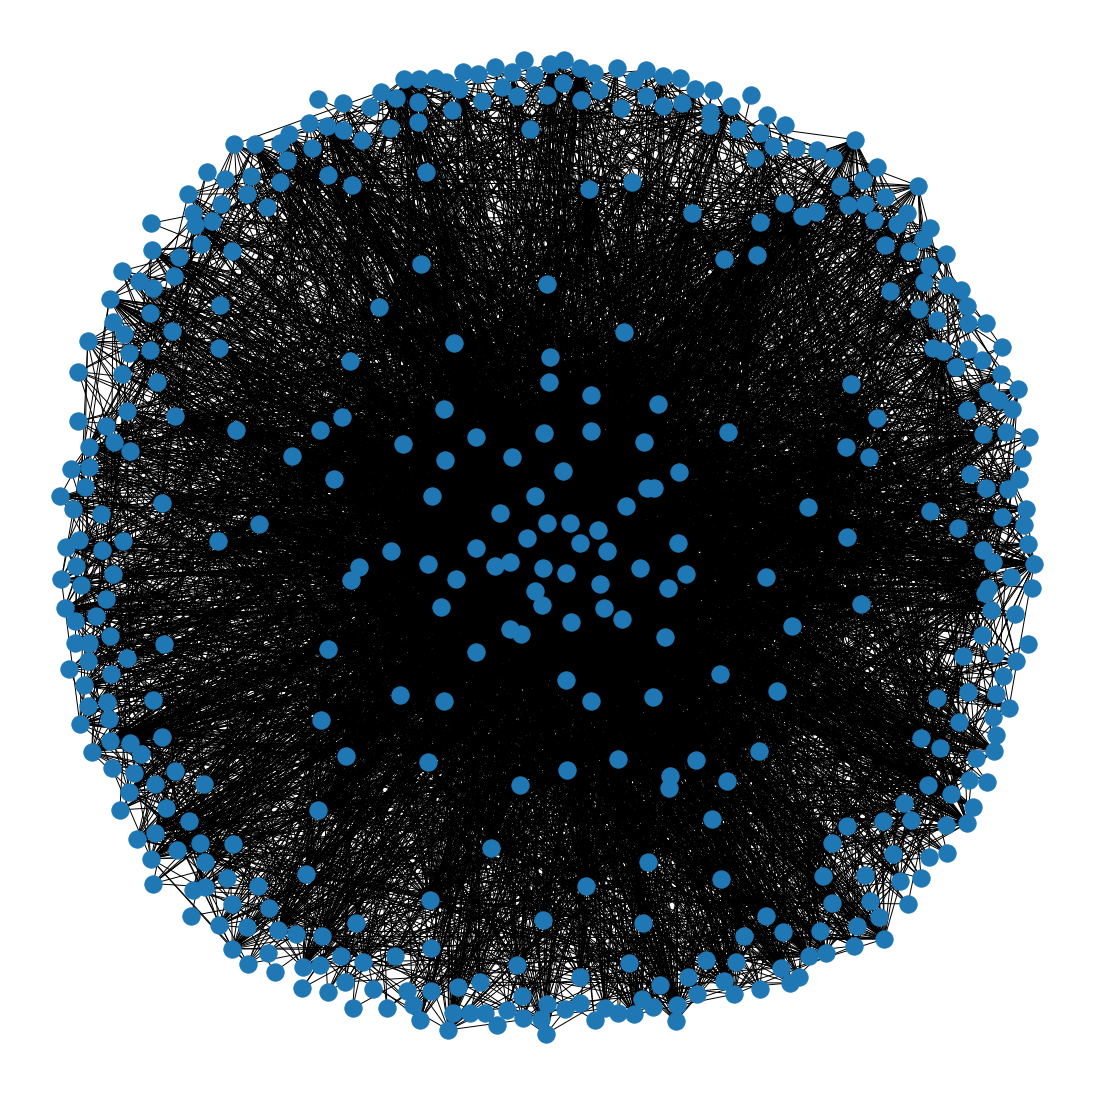

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,15))
nx.draw(G, pos=nx.spring_layout(G, k=2))

## Refine the Visual

As you should see, the initial visualization is a globular mess! Refine the visualization to better picture the center core of the  network.

In [14]:
for i in range(0, 100, 5):
    print('{}th percentile: {}'.format(i, groups.weight.quantile(q=i/100)))

0th percentile: 1.0
5th percentile: 1.0
10th percentile: 1.0
15th percentile: 1.0
20th percentile: 1.0
25th percentile: 1.0
30th percentile: 1.0
35th percentile: 1.0
40th percentile: 1.0
45th percentile: 1.0
50th percentile: 1.0
55th percentile: 1.0
60th percentile: 1.0
65th percentile: 1.0
70th percentile: 2.0
75th percentile: 2.0
80th percentile: 2.0
85th percentile: 3.0
90th percentile: 4.0
95th percentile: 7.0


In [ ]:
groups_meta.set_index('group_id', inplace=True)

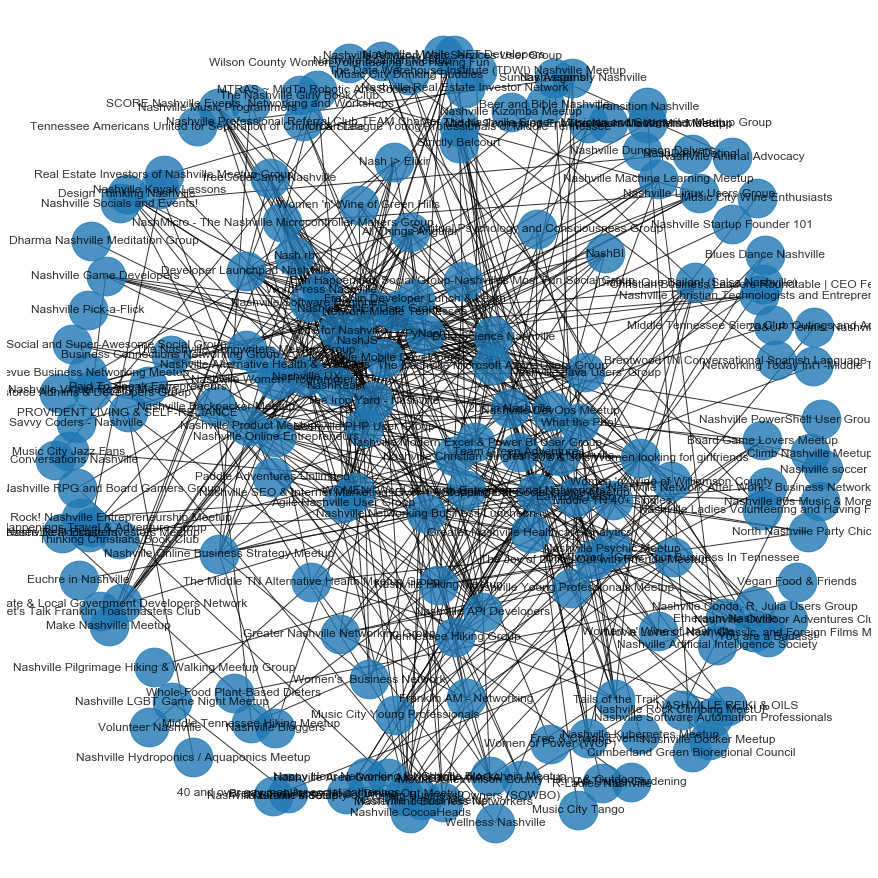

In [19]:
# We can see the 90th percentile is at weight=4, we can use a threshold of 5 to only get the
# draw the edges with the heaviest weights
threshold = 5
G_subset = nx.Graph()

for row in groups.index:
    weight = groups.weight[row]
    if weight < threshold:
        continue
    source = groups_meta.loc[groups.group1[row], 'group_name']
    target = groups_meta.loc[groups.group2[row], 'group_name']
    
    G_subset.add_edge(source, target, weight=weight)
    
plt.figure(figsize=(12,12,))
nx.draw(G_subset, 
        with_labels=True, 
        pos=nx.spring_layout(G_subset, k=2), 
        node_size=1500,
        alpha=0.8);

## Cluster the Network

Now, that the dataset is a little more manageable, try clustering the remaining group nodes.

In [20]:
import numpy as np

In [26]:
gn_clusters = list(nx.community.girvan_newman(G_subset))
for i, cluster in enumerate(gn_clusters):
    print('After removing {} edges, there are {} clusters'.format(i, len(cluster)))

After removing 0 edges, there are 8 clusters
After removing 1 edges, there are 9 clusters
After removing 2 edges, there are 10 clusters
After removing 3 edges, there are 11 clusters
After removing 4 edges, there are 12 clusters
After removing 5 edges, there are 13 clusters
After removing 6 edges, there are 14 clusters
After removing 7 edges, there are 15 clusters
After removing 8 edges, there are 16 clusters
After removing 9 edges, there are 17 clusters
After removing 10 edges, there are 18 clusters
After removing 11 edges, there are 19 clusters
After removing 12 edges, there are 20 clusters
After removing 13 edges, there are 21 clusters
After removing 14 edges, there are 22 clusters
After removing 15 edges, there are 23 clusters
After removing 16 edges, there are 24 clusters
After removing 17 edges, there are 25 clusters
After removing 18 edges, there are 26 clusters
After removing 19 edges, there are 27 clusters
After removing 20 edges, there are 28 clusters
After removing 21 edges, 

## Determine An Optimal Clustering Schema

Finally, determine a final clustering organization.

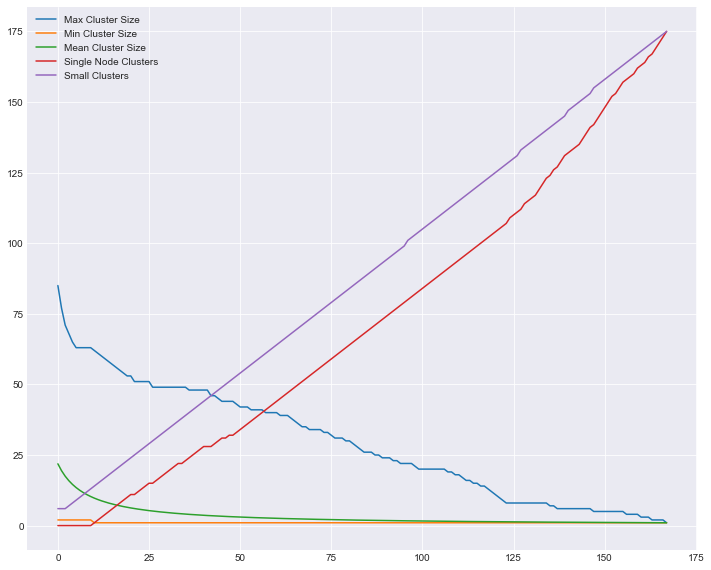

In [25]:
x = range(len(gn_clusters))
plt.figure(figsize=(12, 10))

max_cluster_size = [max([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, max_cluster_size, label='Max Cluster Size')

min_cluster_size = [min([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, min_cluster_size, label='Min Cluster Size')

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, mean_cluster_size, label='Mean Cluster Size')

single_node_clusters = [sum([len(c) == 1 for c in cluster]) for cluster in gn_clusters]
plt.plot(x, single_node_clusters, label='Single Node Clusters')

small_clusters = [sum([len(c) <= 5 for c in cluster]) for cluster in gn_clusters]
plt.plot(small_clusters, label='Small Clusters')

plt.legend()
plt.show()

## Visualize the Clusters

Analyze the output of your clustering schema. Do any clusters of groups stand out to you?

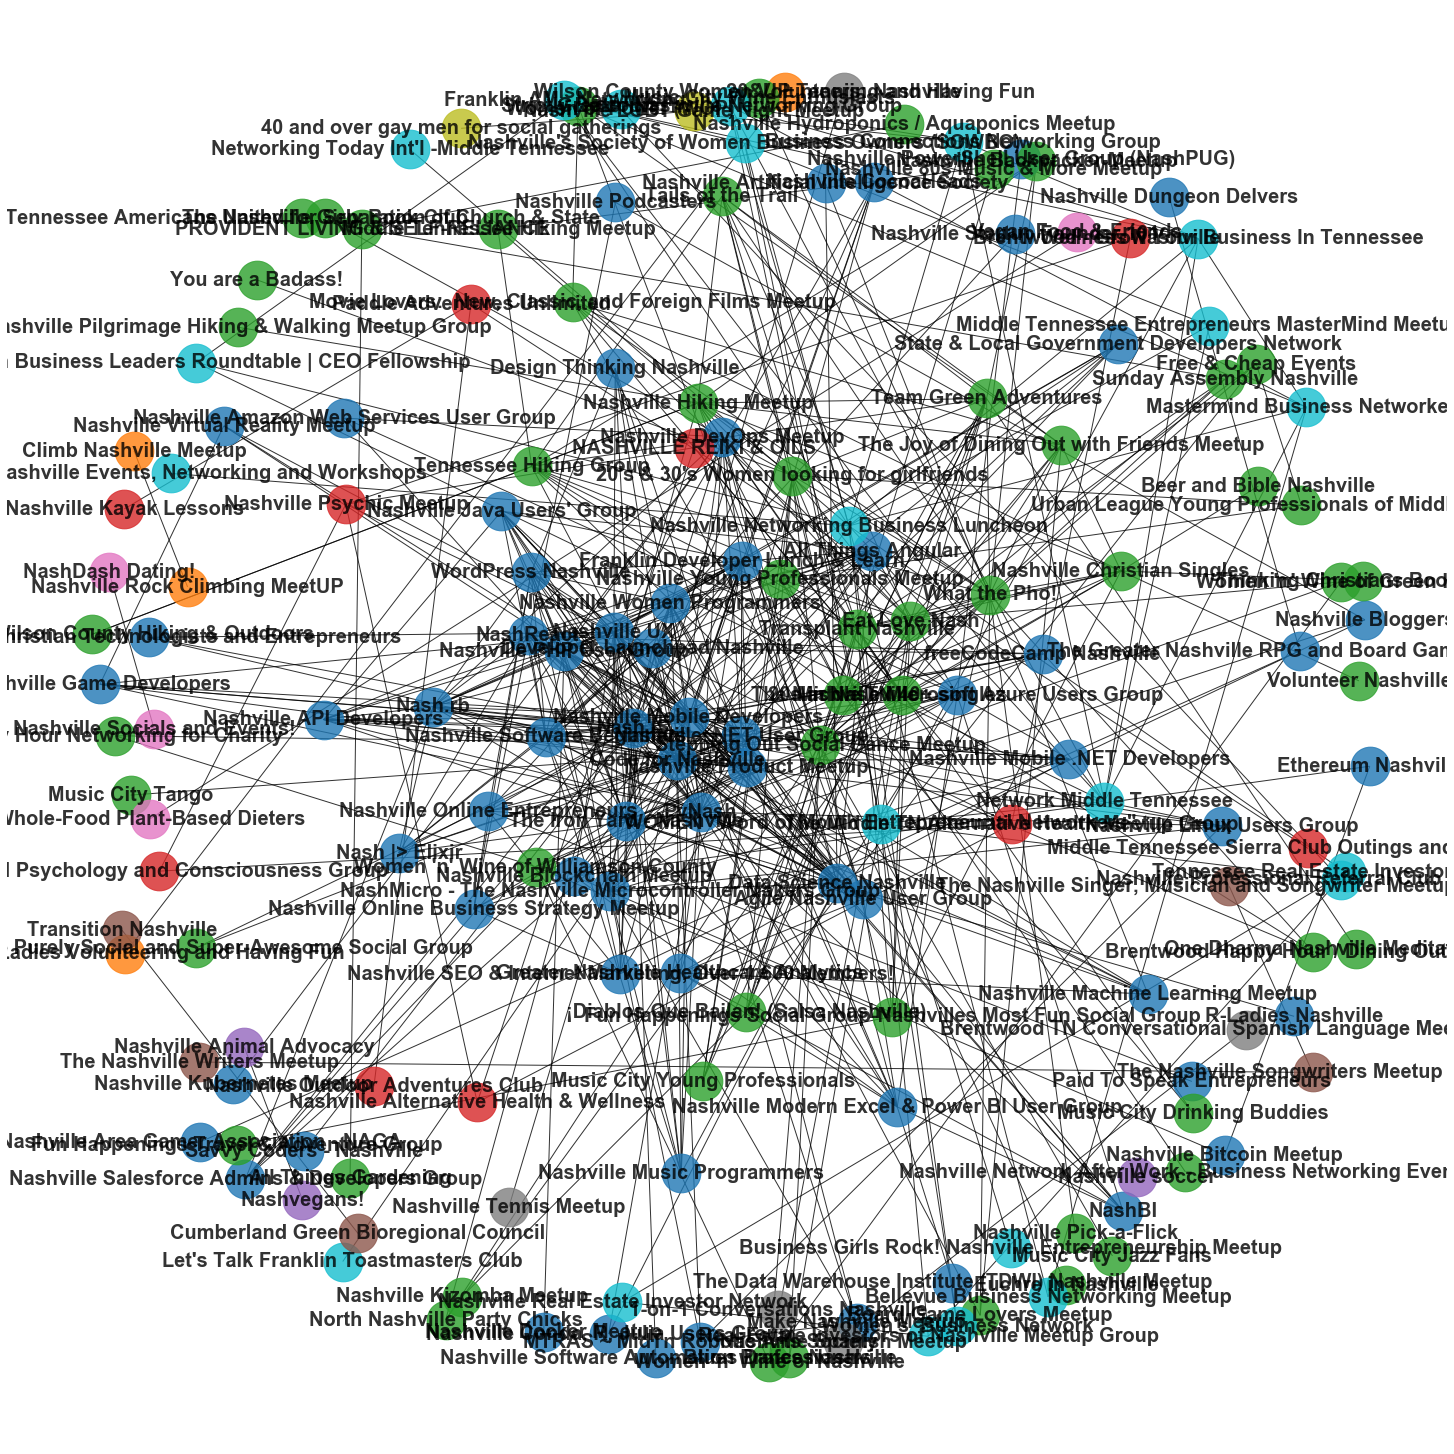

In [34]:
import seaborn as sns

def plot_gn_clusters(Graph, clusters):
    fig = plt.figure(figsize=(20,20))
    colors = sns.color_palette(None, len(clusters))
    
    for n, c in enumerate(clusters):
        ci = Graph.subgraph(c)
        nx.draw(ci, 
                pos=nx.spring_layout(Graph, k=2, seed=0),
                with_labels=True,
                node_size=1500,
                alpha=0.8,
                node_color=np.array([colors[n]]),
                font_weight='bold',
                font_size=20
               )
    plt.show()
    
plot_gn_clusters(G_subset, gn_clusters[10])

## Summary

In this lab, you got another chance to practice your network clustering skills, investigating a meetup dataset of events and groups surrounding the Nashville area. If you're up for the challenge, feel free to continue investigating the dataset and trying to cluster users or events!                                                                                                                                                               

In [35]:
clusters = pd.DataFrame(gn_clusters[20]).transpose()
clusters.columns = ['Cluster{}'.format(i) for i in range(1,len(clusters.columns)+1)]
clusters

Cluster1  \
0                                        Nashville UX   
1                                           NashReact   
2                       Developer Launchpad Nashville   
3                           Design Thinking Nashville   
4                                             Nash.rb   
5                           The Iron Yard - Nashville   
6                                      Nash |> Elixir   
7                      Nashville Online Entrepreneurs   
8                               Make Nashville Meetup   
9           Nashville Online Business Strategy Meetup   
10                        Nashville Blockchain Meetup   
11           Nashville Amazon Web Services User Group   
12                        Nashville Women Programmers   
13                         Agile Nashville User Group   
14                           Nashville PHP User Group   
15                   Franklin Developer Lunch & Learn   
16                  Nashville Machine Learning Meetup   
17  Nashville Christian Technologists and Entrepre...   
18                                WordPress Nashville   
19        State & Local Government Developers Network   
20                           Nashville Product Meetup   
21                                 All Things Angular   
22  NashMicro - The Nashville Microcontroller Make...   
23                        Nashville Mobile Developers   
24                        Nashville Music Programmers   
25                                 Code for Nashville   
26          The Nashville Microsoft Azure Users Group   
27                               Nashville CocoaHeads   
28                       Nashville Software Beginners   
29                                             PyNash   
30             Greater Nashville Healthcare Analytics   
31     Nashville Salesforce Admins & Developers Group   
32                   Nashville Virtual Reality Meetup   
33                           Nashville API Developers   
34                                             NashJS   
35                          Nashville .NET User Group   
36       Nashville Modern Excel & Power BI User Group   
37                            Nashville DevOps Meetup   
38                             freeCodeCamp Nashville   
39                           Nashville Bitcoin Meetup   
40                               Nashville Podcasters   
41                 MTRAS ~ MidTn Robotic Arts Society   
42                             Data Science Nashville   
43                                             NashBI   
44              Nashville Conda, R, Julia Users Group   
45                                 Ethereum Nashville   
46  Nashville SEO & Internet Marketing, Over 1,600...   
47                          Nashville Game Developers   
48                        Nashville Java Users' Group   
49                                 Nashville Bloggers   
50                        Nashville Linux Users Group   
51          Nashville Artificial Intelligence Society   
52                   Nashville Mobile .NET Developers   

                                           Cluster2  \
0      Nashville Ladies Volunteering and Having Fun   
1   Wilson County Women Volunteering and Having Fun   
2                                              None   
3                                              None   
4                                              None   
5                                              None   
6                                              None   
7                                              None   
8                                              None   
9                                              None   
10                                             None   
11                                             None   
12                                             None   
13                                             None   
14                                             None   
15                                             None   
16                             